# Human Factors Prediction Model => LSTM(ASRS+NTSB)

## Import Notebook

In [1]:
%run notebook_model_ls.ipynb
%run notebook_model_lstm.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2024-09-29 00:31:17.813216: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.metrics import f1_score, accuracy_score, hamming_loss

def show_accuracy(model):

    y_true = model.Y_test
    y_pred = model.Y_pred

    accuracy = accuracy_score(y_true, y_pred)

    # code adapted from (F1_Score, n.d.)
    macro_f1_score = f1_score(y_true, y_pred, average='macro')
    micro_f1_score = f1_score(y_true, y_pred, average='micro')
    weighted_f1_score = f1_score(y_true, y_pred, average='weighted')
    # end of adapted code

    hamming_loss_value = hamming_loss(y_true, y_pred)

    print(f'Accuracy: {(accuracy*100):.2f}')
    print(f'Micro F1 Score: {(micro_f1_score*100):.2f}')
    print(f'Macro F1 Score: {(macro_f1_score*100):.2f}')
    print(f'Weighted F1 Score: {(weighted_f1_score*100):.2f}')
    print(f'Hamming Loss: {hamming_loss_value:.4f}')

    model.classification_report

In [3]:
# 01. Get Data
asrs_df = CoreUtils.get_data('asrs', from_year=2023, to_year=2023)
# asrs_df.sort_values(by='date', ascending=False, inplace=True)
# asrs_df = asrs_df.head(500)

ntsb_df = CoreUtils.get_data('ntsb', from_year=2018, to_year=2023)
# ntsb_df.sort_values(by='date', ascending=False, inplace=True)
# ntsb_df = ntsb_df.head(500)

df =  pd.concat([asrs_df, ntsb_df], axis=0).reset_index(drop=True)
df.sort_values(by='date', inplace=True)

ls_version = 2 # Default version=2
ls_name = 'asrs_ntsb'
ds_name='asrs_ntsb'

In [ ]:
def call_modal(options):
    dfs = { ds_name: df.copy() }
    model = LSTMModel(dfs, ds_name=ds_name, options=options)
    model.train()

    # 03. Evaluate Model
    evaluate_result = model.evaluate()
    return model

## LSTM(ASRS+NTSB) + LS(Hybrid)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (8891, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


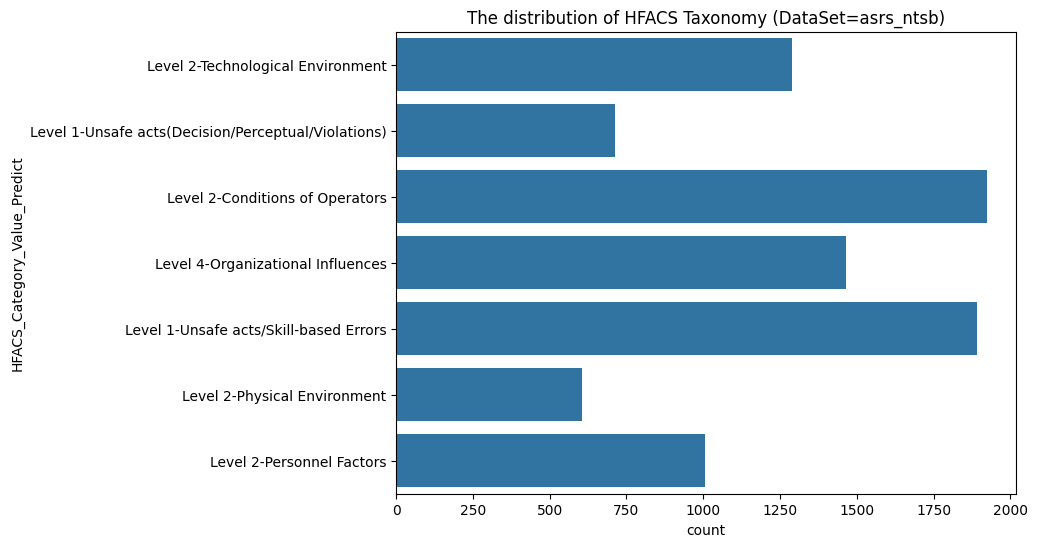

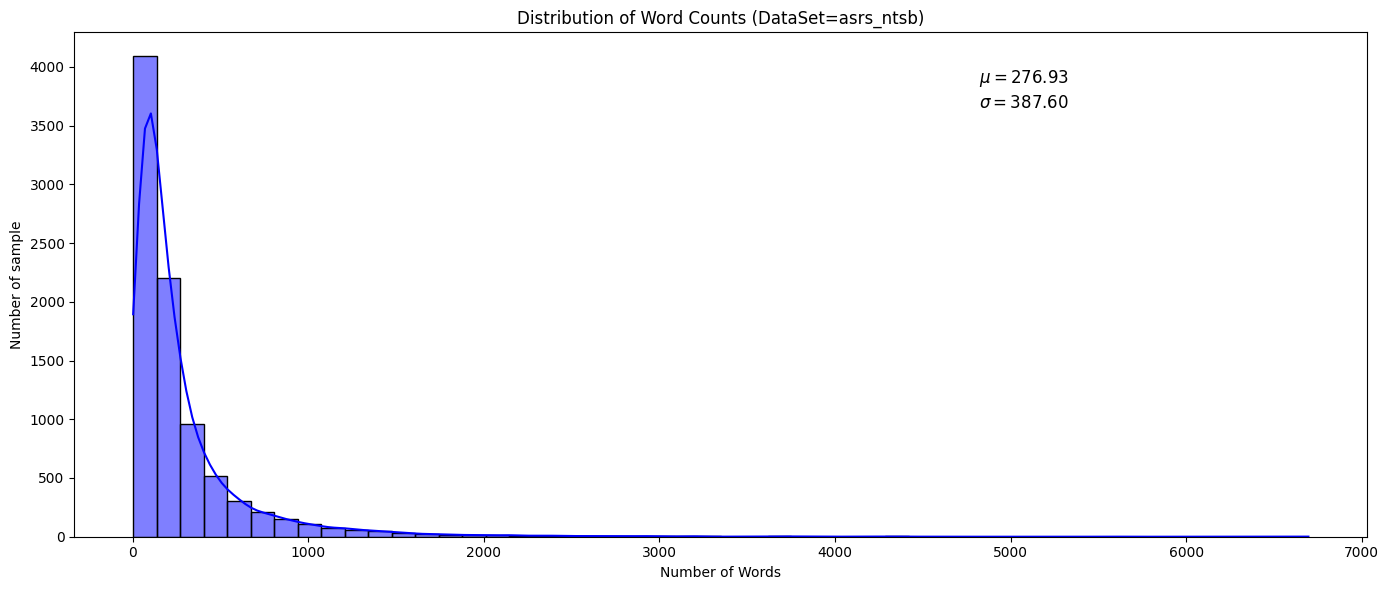

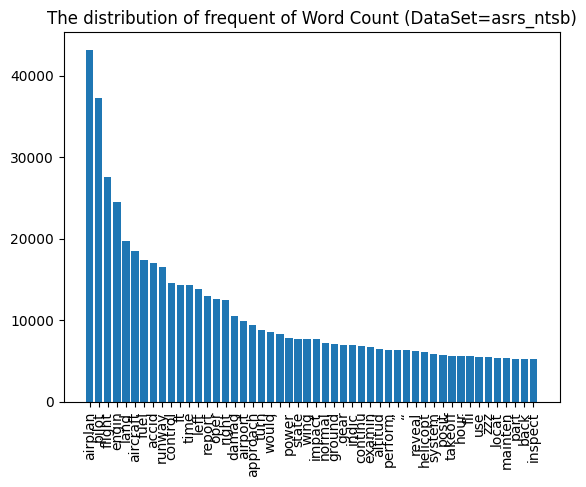

Total unique words: 58463
Define Y
Shape of label tensor: (8891,)
Define X
Found 58464 unique tokens.
Shape of data tensor: (8891, 300)
(7112, 300) (7112,)
(1779, 300) (1779,)
Counter({1: 1526, 2: 1523, 6: 1151, 5: 1036, 3: 812, 0: 567, 4: 497})
Counter({1: 1526, 2: 1523, 6: 1151, 5: 1036, 3: 812, 0: 567, 4: 497})
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 92s 433ms/step - accuracy: 0.2182 - loss: 1.9297 - val_accuracy: 0.2711 - val_loss: 1.8786
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 82s 410ms/step - accuracy: 0.2863 - loss: 1.8236 - val_accuracy: 0.3511 - val_loss: 1.6500
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 76s 381ms/step - accuracy: 0.3449 - loss: 1.6437 - val_accuracy: 0.3567 - val_loss: 1.6204
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 80s 398ms/step - accuracy: 0.3567 - loss: 1.6070 - val_accuracy: 0.3666 - val_loss: 1.6016
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 89s 442ms/step - accuracy: 0.3898 - loss: 1.5412 - val_accuracy: 0.3961 - val_loss: 1.5751
Epoch 6/10
200/200 ━━━━━━━━━━

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

278/278 ━━━━━━━━━━━━━━━━━━━━ 35s 125ms/step


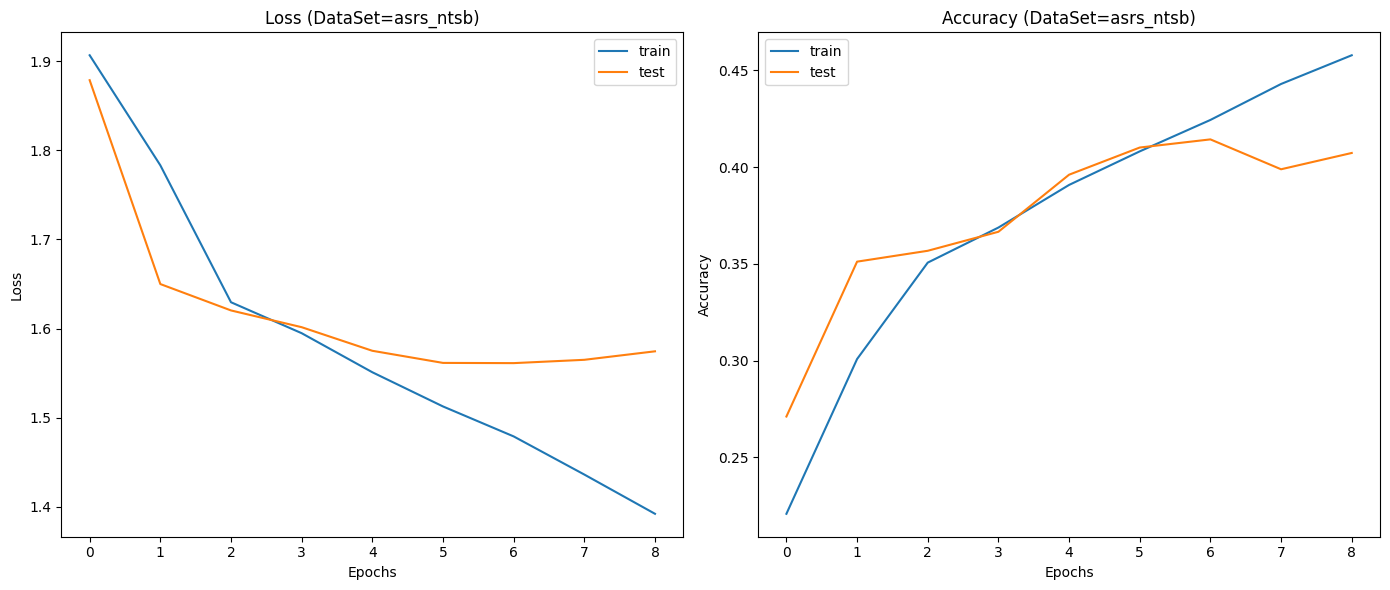

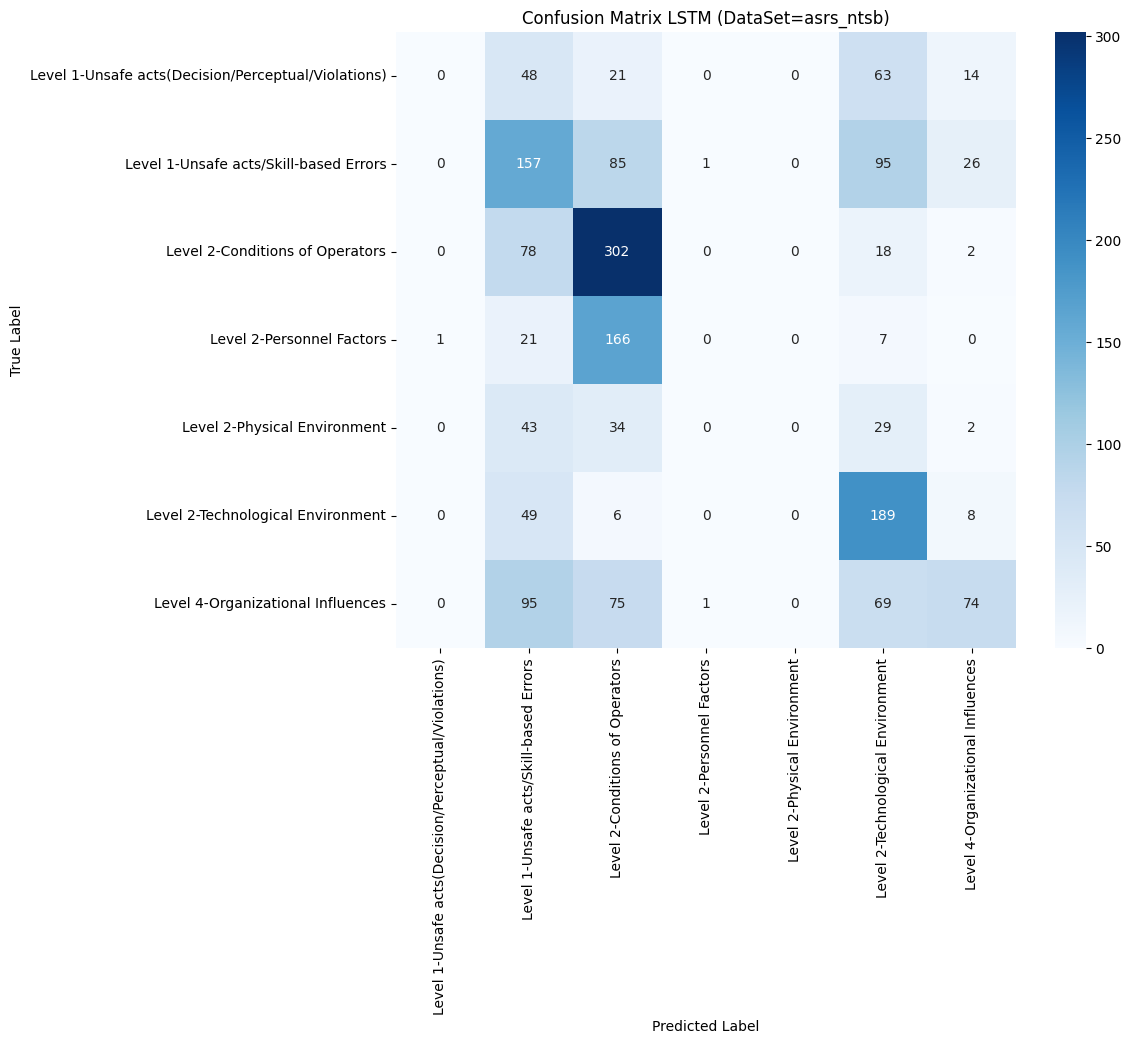

In [4]:
options = {
    "sample_size": 0, 
    "max_length": 300, 
    "max_nb_words": 50000, 
    "is_enable_smote": False,
    "is_enable_asasyn": False,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 02. Train Model
lstm_model = call_modal(options)

## LSTM(ASRS+NTSB) + LS(Hybrid) + Class Weight

In [5]:
options = {
    "sample_size": 0, 
    "max_length": 300, 
    "max_nb_words": 50000, 
    "is_enable_smote": False,
    "is_enable_asasyn": False,
    "is_enable_class_weight": True,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 02. Train Model
lstm_model_weight = call_modal(options)

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0


KeyboardInterrupt: 

## LSTM(ASRS+NTSB) + LS(Hybrid) + SMOTE

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (8891, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


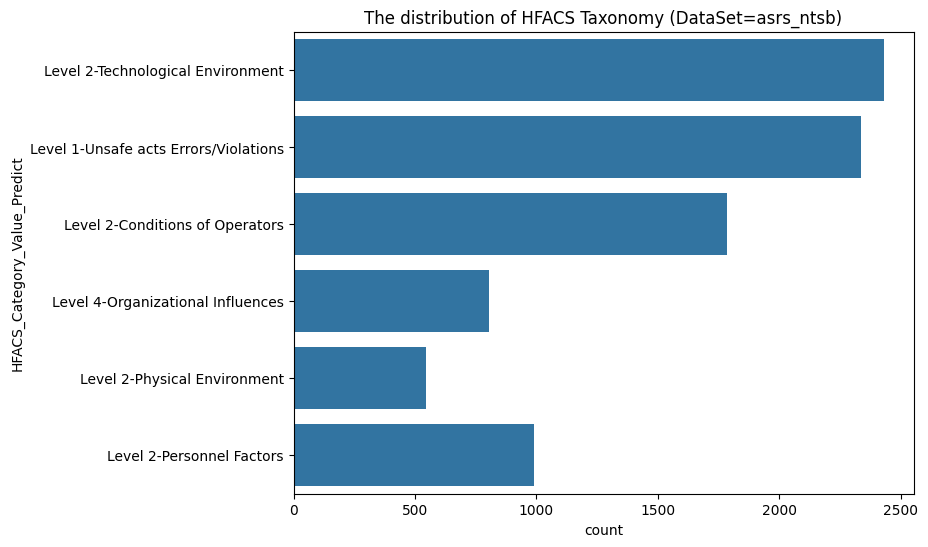

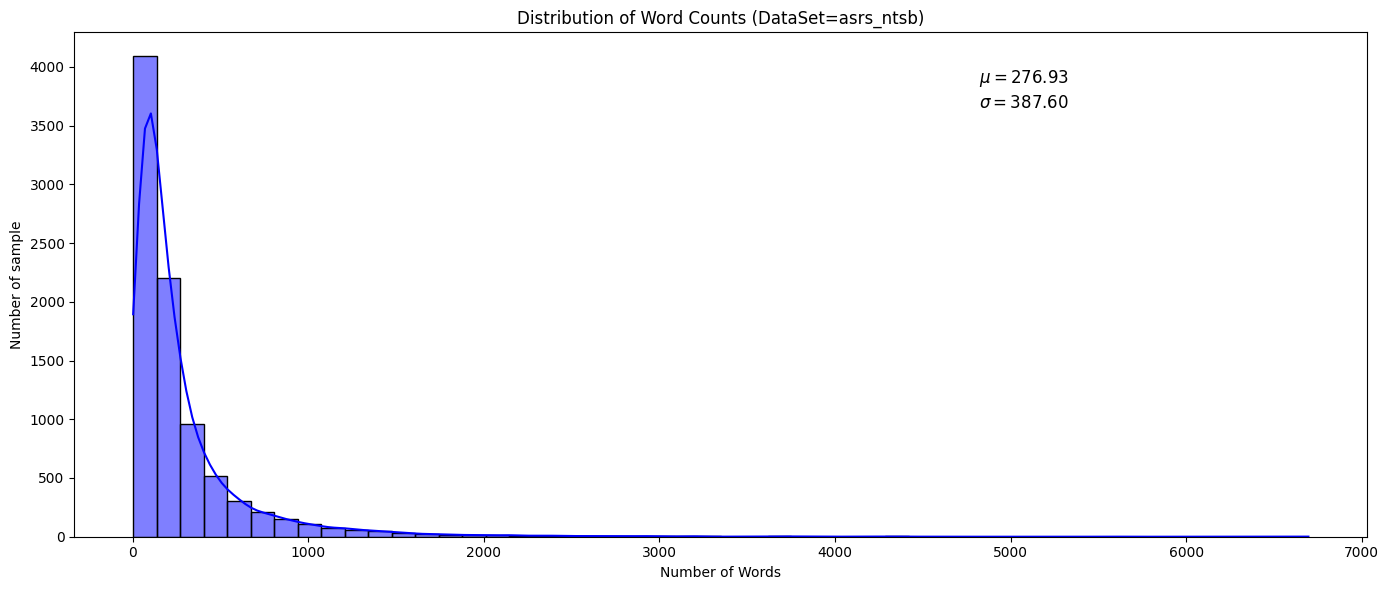

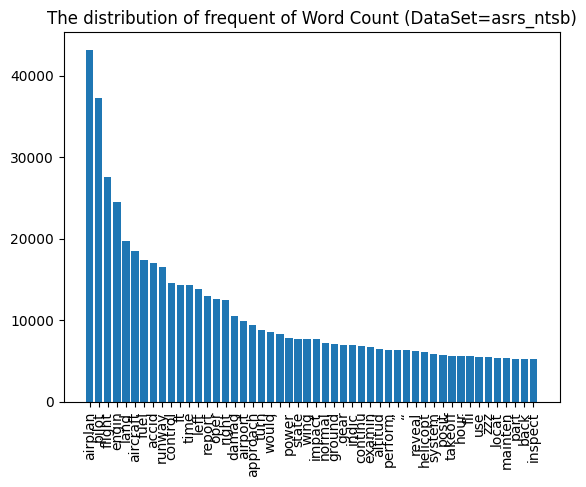

Total unique words: 58463
Define Y
Shape of label tensor: (8891,)
Define X
Found 58464 unique tokens.
Shape of data tensor: (8891, 300)
(7112, 300) (7112,)
(1779, 300) (1779,)
4    513
0    446
1    371
2    192
5    161
3     96
Name: count, dtype: int64
4    1918
0    1892
1    1414
2     797
5     643
3     448
Name: count, dtype: int64
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 178ms/step - accuracy: 0.2531 - loss: 1.7696 - val_accuracy: 0.3132 - val_loss: 1.6599
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 193ms/step - accuracy: 0.3184 - loss: 1.5974 - val_accuracy: 0.4143 - val_loss: 1.4812
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 185ms/step - accuracy: 0.3974 - loss: 1.4580 - val_accuracy: 0.4228 - val_loss: 1.4555
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 182ms/step - accuracy: 0.4227 - loss: 1.3976 - val_accuracy: 0.4396 - val_loss: 1.4498
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 182ms/step - accuracy: 0.4309 - loss: 1.3921 - val_accuracy: 0.4270 - val_loss: 1.4413
Epo

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

278/278 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step


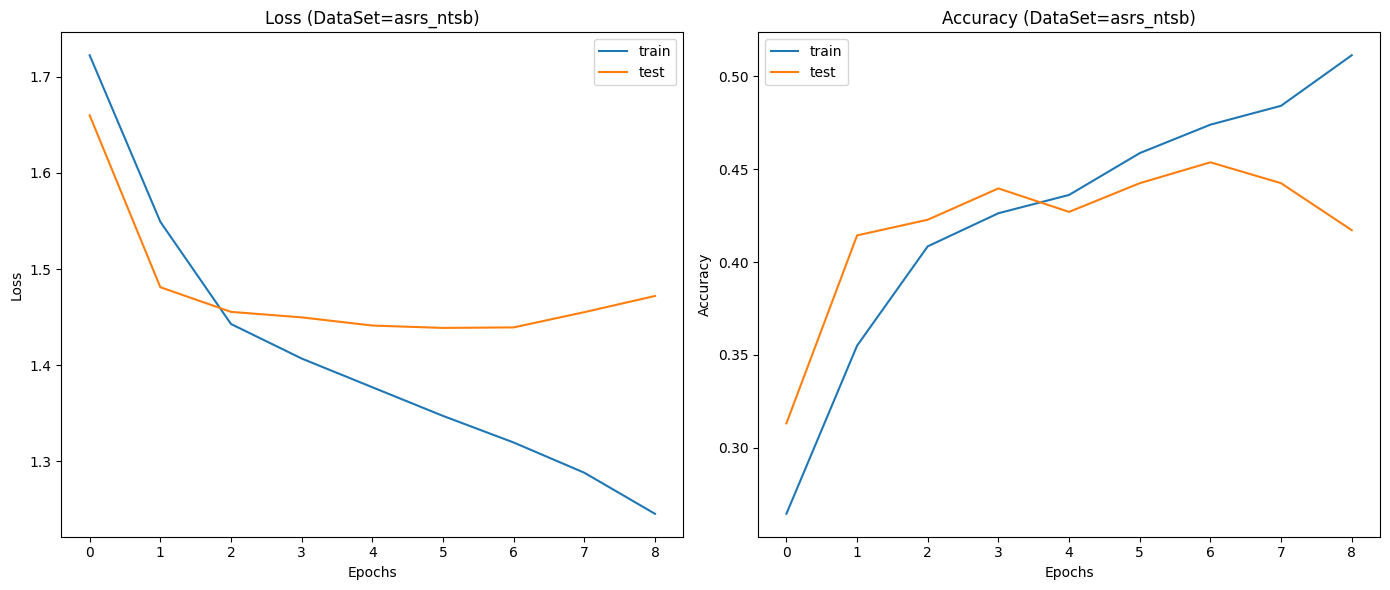

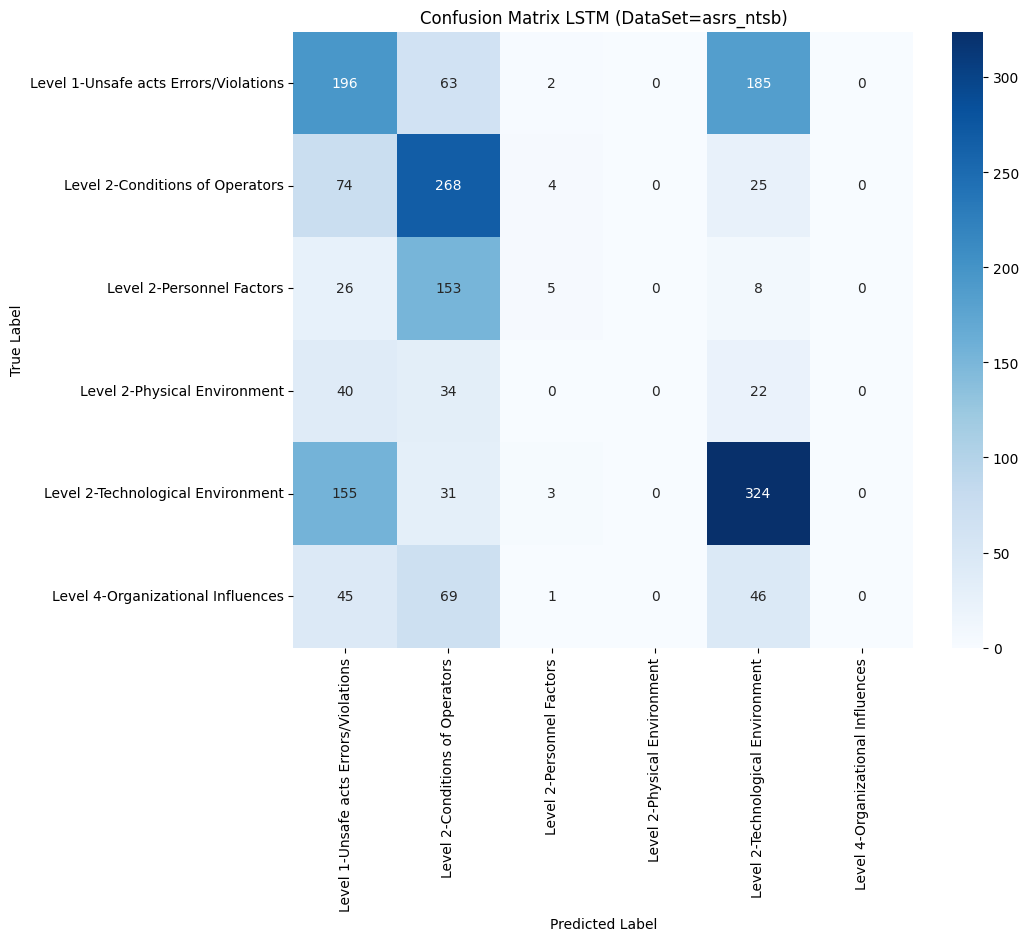

In [6]:
options = {
    "sample_size": 0, 
    "max_length": 300, 
    "max_nb_words": 50000, 
    "is_enable_smote": True,
    "is_enable_asasyn": False,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 02. Train Model
lstm_model_smote = call_modal(options)

## LSTM(ASRS+NTSB) + LS(Hybrid) + ASASYN

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (8891, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
Pre processed


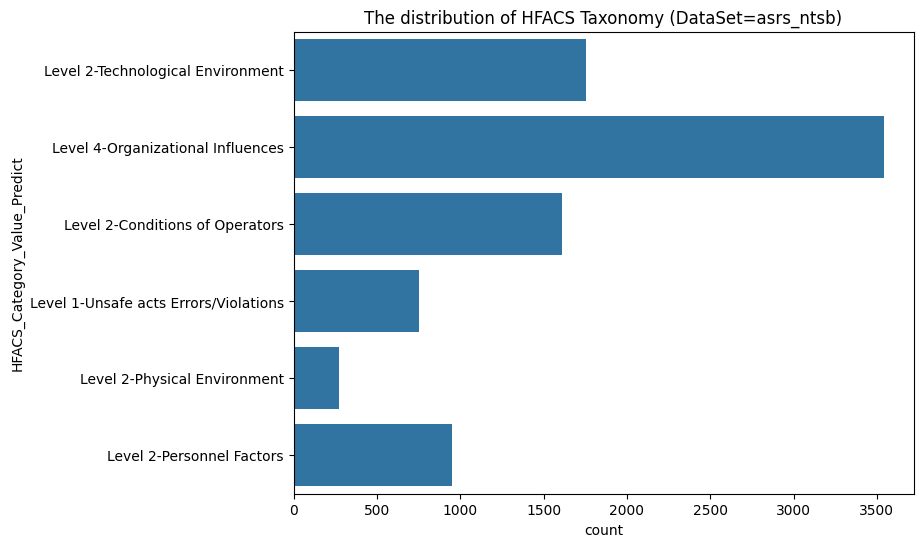

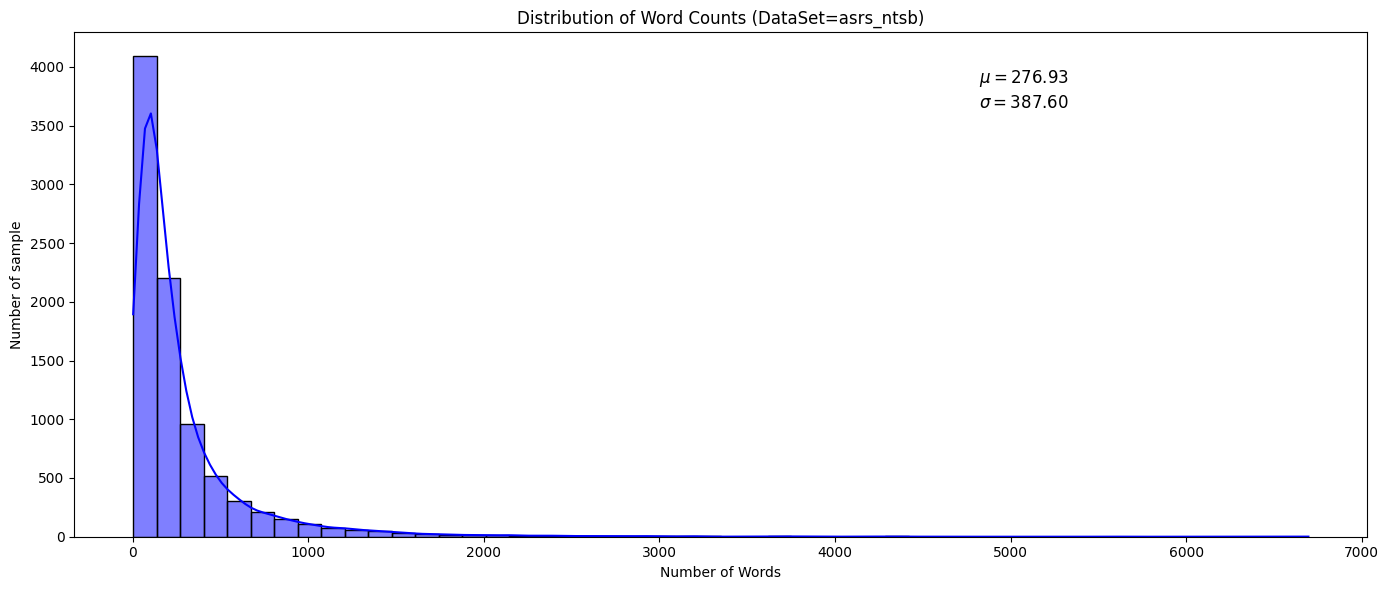

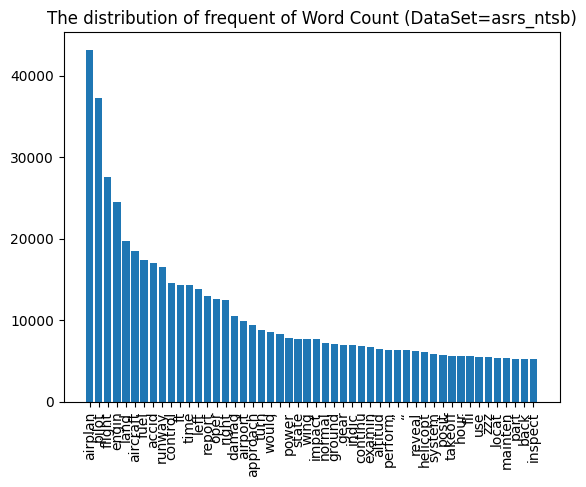

Total unique words: 58463
Define Y
Shape of label tensor: (8891,)
Define X
Found 58464 unique tokens.
Shape of data tensor: (8891, 300)
(7112, 300) (7112,)
(1779, 300) (1779,)
5    725
4    354
1    329
2    184
0    141
3     46
Name: count, dtype: int64
5    2818
4    1403
1    1283
2     765
0     614
3     229
Name: count, dtype: int64
{0: 1.9305103148751357, 1: 0.9238763315146792, 2: 1.5494553376906317, 3: 5.176128093158661, 4: 0.844856260394393, 5: 0.42062928791104803}
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 45s 196ms/step - accuracy: 0.3257 - loss: 1.7627 - val_accuracy: 0.4986 - val_loss: 1.3892
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 182ms/step - accuracy: 0.5051 - loss: 1.5264 - val_accuracy: 0.4354 - val_loss: 1.3426
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 180ms/step - accuracy: 0.4776 - loss: 1.4703 - val_accuracy: 0.4438 - val_loss: 1.3313
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 184ms/step - accuracy: 0.4763 - loss: 1.4338 - val_accuracy: 0.4494 - val_loss: 1.3

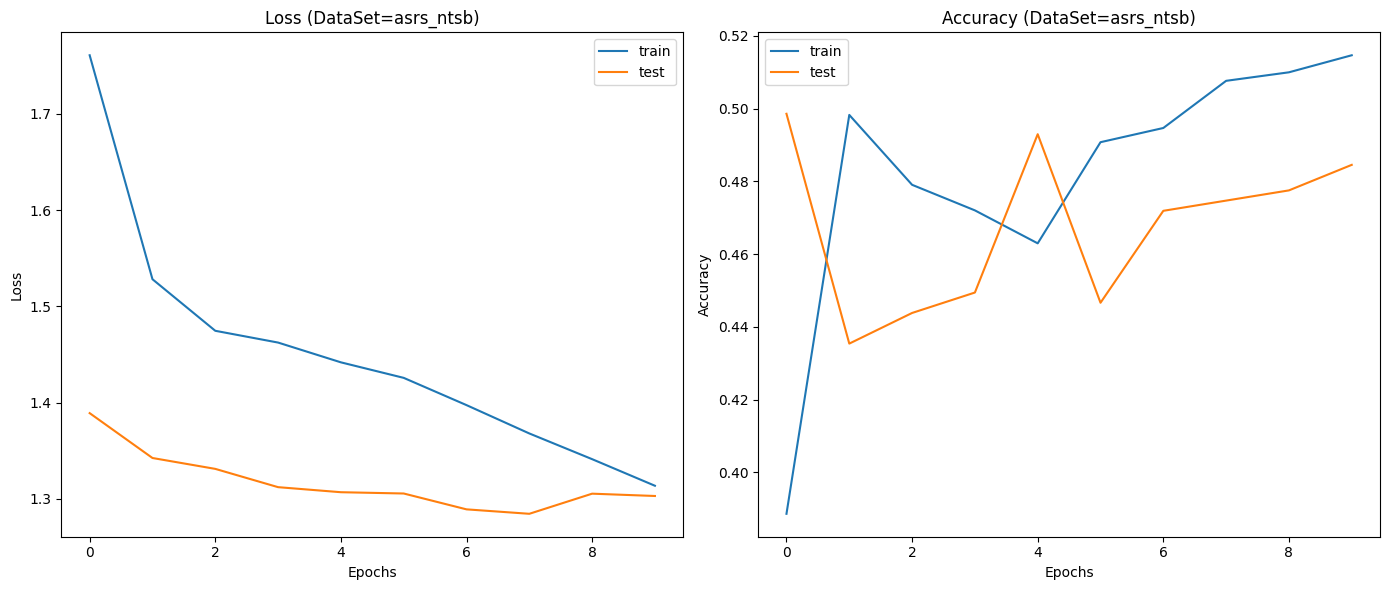

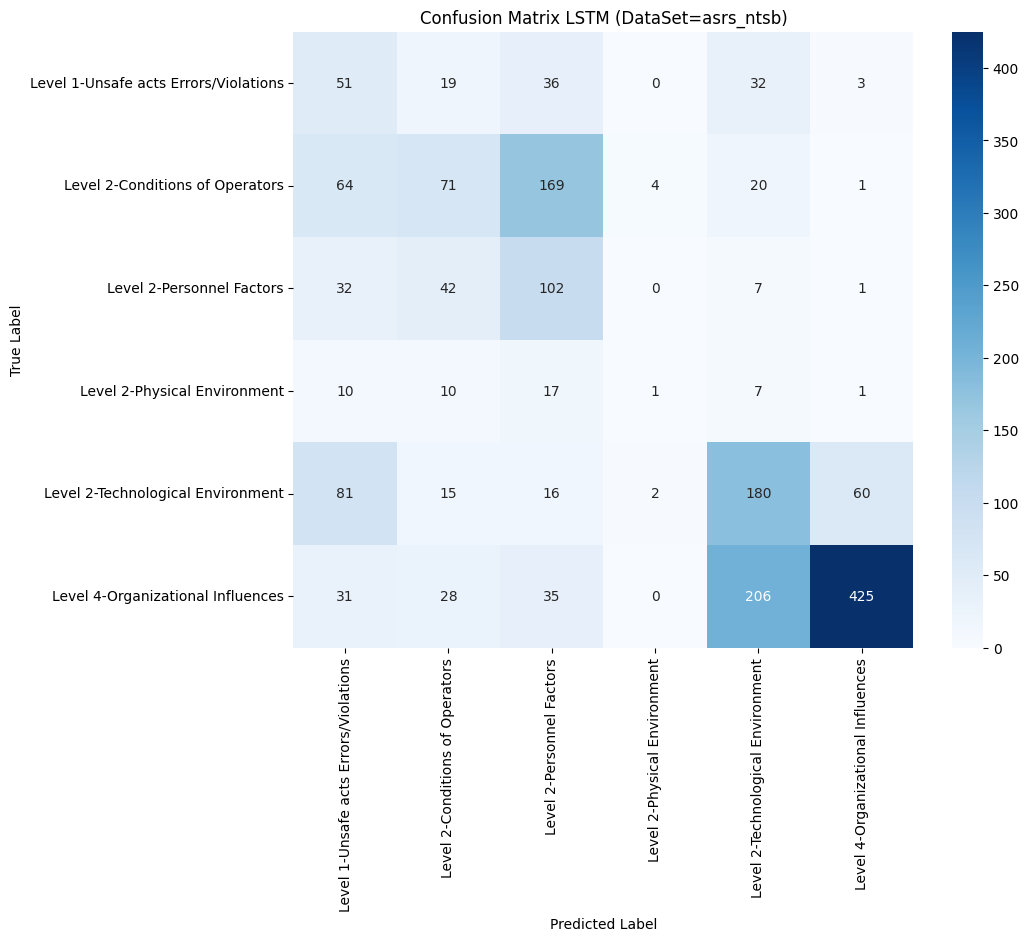

In [12]:
options = {
    "sample_size": 0, 
    "max_length": 300, 
    "max_nb_words": 50000, 
    "is_enable_smote": False,
    "is_enable_asasyn": True,
    "is_enable_class_weight": False,
    "ls_name": ls_name,
    "ls_version": ls_version
}

# 02. Train Model
lstm_model_asasyn = call_modal(options)

## Summary of Accuracy

In [7]:
# Show Accuracy
print('ASRS+LS(Hybrid)=========')
show_accuracy(lstm_model)
print('ASRS+LS(Hybrid)+Class Imbalance=========')
show_accuracy(lstm_model_weight)
print('ASRS+LS(Hybrid)+SMOTE=========')
show_accuracy(lstm_model_smote)
print('ASRS+LS(Hybrid)+ASAYN=========')
show_accuracy(lstm_model_asasyn)

ASRS+LS(Hybrid)=========


NameError: name 'lstm_asrs_ntsb_model' is not defined